
#  Introduction to Reinforcement Learning

**_Author: Jacob Koehler, Guilherme Freitas and Dhavide Aruliah_**

**Reviewer: Jessica Cervi**

**Expected time = 2.5 hours**

**Total points = 65 points**

    
## Assignment Overview


The focus of this assignment is **Reinforcement Learning**, i.e., the branch of machine learning concerned with choosing actions in an environment where labeled input/output pairs may not be available and sub-optimal actions may not be explicitly corrected. The principal idea is to balance the exploration of uncharted territory with exploitation of current knowledge to maximize some kind of a cumulative reward. In this assignment, we aim to encapsulate the ideas from the lectures in code. In the first part, we'll use some basic pre-made environments from OpenAI's `gym` package to explore the effect of different policies on agents. In the second part, we'll experiment with a *multi-armed bandit*.

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Differentiate between Reinforcerment Learning and Machine Learning
- Implement various policies for different games
- Represent Markov decision processes
- Define transition probability and reward matrices
- Implement a Q-Value iteration and extract the optimal policy
- Implement multi-armed bandit problems in Python



## Index: 

####  Introduction to Reinforcement Learning

- [Question 1](#q01)
- [Question 2](#q02)
- [Question 3](#q03)
- [Question 4](#q04)
- [Question 5](#q05)
- [Question 6](#q06)
- [Question 7](#q07)
- [Question 8](#q08)
- [Question 9](#q09)
- [Question 10](#q10)


##  Introduction to Reinforcement Learning

Before we begin, it is important to know the difference between Reinforcement Learning and Machine Learning.


[Back to top](#Index:) 
<a id='q01'></a>


### Question 1:

*5 points*

Which of the following choices are characteristics of reinforcement learning problems? 
Select all that apply and construct your solutions as a list of strings

+ a) There are known labels on all observations
+ b) Data is sequential 
+ c) We are working with iid data
+ d) Delayed feedback after actions

Provide your answer as a list of strings bound to `ans_1`.

In [1]:
### GRADED
### 
### YOUR SOLUTION HERE:
ans_1 = ['b', 'd']
###
### YOUR CODE HERE
###


In [2]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## A Basic Example

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/BlackJack6.jpg/500px-BlackJack6.jpg)

The example below demonstrates a basic Reinforcement Learning problem using **OpenAI**'s gym.  Here, we replicate a game of blackjack where our actions are either to take a hit or stay.  The rules of blackjack are simple:


- Get 21 points on the player's first two cards (called a "blackjack" or "natural"), without a dealer blackjack;
- Reach a final score higher than the dealer without exceeding 21; or
- Let the dealer draw additional cards until their hand exceeds 21 ("busted").

Here, we will start a new game and explore some different strategies for when to take a card, when to hold, and when to hit.  Below is a description of the environment from the documentation [here](https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py).

```
Blackjack is a card game where the goal is to obtain cards that sum to as near as possible to 21 without going over. They're playing against a fixed dealer. 
Face cards (Jack, Queen, King) have a point value of 10. 
Aces can either count as 11 or 1, and it's called 'usable' at 11. 
This game is placed with an infinite deck (or with replacement). 
The game starts with each (player and dealer) having one face up and one face down card. The player can request additional cards (hit=1) until they decide to stop (stick=0), or exceed 21 (bust).
After the player sticks, the dealer reveals their face-down card, and draws until their sum is 17 or greater.  
If the dealer goes bust the player wins.
If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21. 
The reward for winning is +1, drawing is 0, and losing is -1.
The observation of a 3-tuple of: the players current sum,the d ealer's one showing card (1-10 where 1 is ace),
and whether or not the player holds a usable ace (0 or 1).
```


We begin by importing the necessary libraries.

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gym

In [5]:
env = gym.make('Blackjack-v0') # Create a new game environment

In [6]:
# Start a new game. tuple returned is of form
# (player hand, dealer hand, usable ace)
env.reset()

(14, 1, False)

In [7]:
# Take another card (Hit)
# Now values are given as
# ((player hand, dealer hand, usable ace), reward, game over, info)
env.step(1)

((16, 1, False), 0.0, False, {})

In [11]:
# hold 
play = env.step(0)

In [14]:
play[0][0]

16


### Implementing a "Hit below 18" Policy in Blackjack


[Back to top](#Index:) 
<a id='q02'></a>


### Question 2:

*5 points*

Now, we construct our first policy for the **Blackjack** environment. We will take action 1 if our hand is below 18, otherwise stay. We define a function that will take in an observation tuple `(player hand, dealer hand, usable ace)` and return 1 or 0 depending on the player hand.

Complete the function `hit_under_18()` below according to instructions.


In [15]:
### GRADED 
### 
def hit_under_18(obs):
    ''' 
    This function takes in an observation from the enviornment
    and hits whenever a hand is under 18.
    
    
    Parameters
    ----------
    obs: Tuple of the form (player hand, dealer hand, usable ace)
    
    Returns
    -------
    1 or 0 depending on whether player hand is > 18
    
    Examples:
    ---------
    obs1 = (14, 10, False)
    hit_under_18(obs1) ====> 1
    
    obs = (19, 8, True) 
    hit_under_18(obs2) ====> 0
    '''
    player, dealer, ace = obs
    if player > 18:
        return 0
    else:
        return 1
###
### YOUR CODE HERE
###


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


###  Simulating Numerous Blackjack Hands

[Back to top](#Index:) 
<a id='q03'></a>


### Question 3:

*10 points*

Now that we have a policy, we will explore how it performs over a number of games. We need to construct a function `simulate_play()` that accepts:
- `n_plays`: Number of iterations to simulate play based on.
- `policy` : Policy function to implement decisions

and returns the average results of simulating that many play iterations.  
Your function should loop over the given number of iterations, check the status of the game and implement our `hit_under_18` policy. We want to pursue each strategy for 10 plays in each game to assure we come to completion.


Complete the function `simulate_play()` below according to instructions.

In [22]:
def simulate_play(n_plays, policy):
    rewards = []
    
    for play in range(n_plays):
        feedback = env.reset()
        end = False
        
        while not end:
            action = policy(feedback)
            feedback, reward, end, _ = env.step(action)
            
            if end:
                rewards.append(reward)
                break
                
    return np.array(rewards).mean()            

In [68]:
n_plays = 500
policy = hit_under_18
print(simulate_play(n_plays, hit_under_18)) 

-0.238


In [71]:
### GRADED
### 
def simulate_play(n_plays, policy):
    '''
    This function takes in a number of plays and a policy.
    We return the average reward based on the plays.
    
    
    Parameters
    -----------
    plays: Number of iterations to simulate play based on.
    policy: Policy function to implement decisions
    
    Returns
    -------
    avg: average reward over episodic play
    
    
    Examples:
    ---------
    n_plays = 500
    policy = hit_under_18
    print(simulate_play(n_plays, hit_under_18)) =====> 
    '''
    rewards = []

    for play in range(n_plays):
        feedback = env.reset()
        end = False

        while not end:
            action = policy(feedback)
            feedback, reward, end, _ = env.step(action)

            if end:
                rewards.append(reward)
                break

    return np.array(rewards).mean()
###
### YOUR CODE HERE
###


In [72]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Representing a Markov Decision Process

Now, we move to a different problem.  We aim to represent the key components of the *Markov Decision Process* as discussed from Videos 21-3 through 21-10. In particular, we'll discuss the example of a robot moving as described in Video 21-5.

<center>
    <img src=assets/MDP.png width=60% />
</center>

In the preceding image, we've adjusted our diagram to represent each individual action $a_0(\text{move slow}), a_1(\text{move fast})$ and their respective transition probabilities between states.

We will use the image to represent this problem with three mathematical objects:

- *P*: a *transition probability matrix* of the form $P(s, a, s')$.
- *R*: a *reward matrix* of the form $R(s, a, s')$.
- *$\gamma$*:  a *discount rate*

Technically, both $P$ and $R$ are described as three-dimensional arrays rather than "matrices" (two-dimensional arrays). Your next two tasks are to represent the transition probability & reward matrices as NumPy arrays.

### Defining a Transition Probability Matrix

[Back to top](#Index:) 
<a id='q04'></a>


### Question 4:

*5 points*

Our task here is to extract a representation for the transition probability matrix $P$ from the preceding diagram.

+ The identifier `P` should be a three-dimensional NumPy array of shape `(3, 2, 3)` (corresponding to $|S|\times |A|\times |S|$ where $S$ is the set of all possible states and $A$ is the set of all possible actions.
+ The entry $P(s, a, s')$ is the probability of transition from state $s$ to state $s'$ upon executing action $a$.
+ Assume the set of states $S$ is ordered as
  $$ \text{Standing}\rightarrow0, \text{Fallen}\rightarrow1, \text{Moving}\rightarrow2.  $$
+ Assume the set of actions $A$ is ordered as
  $$ \text{Slow}\rightarrow0, \text{Fast}\rightarrow1. $$
+ You can read the transition probabilities from the diagram above (or from slide 9 of the notes). In both diagrams, the transition probabilities are the leftmost numbers attached to the arrows representing transitions between states (upon appropriate actions).
+ From the fallen state, the "Fast" action is not available. Rather than assigning those transition probabilities a zero, use `np.nan` to represent all transition probabilities with an initial state "Fallen" (i.e., $s=1$).

Assign the resulting transition probability matrix as a `Numpy` array to `P`.


In [77]:
### GRADED

### YOUR SOLUTION HERE:
P = np.array([[[0, 0, 1],[0, 0.4, 0.6]],
              [[0.4, 0.6, 0],[np.nan,np.nan,np.nan]],
              [[0, 0, 1],[0, 0.2, 0.8]],
              ])
###
### YOUR CODE HERE
###


In [78]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


###  Defining a Reward Matrix

[Back to top](#Index:) 
<a id='q05'></a>


### Question 5:

*5 points*

Following a logic similar to the preceding task, we now want to extract a representation for the reward matrix $R$ from the diagram.

+ The identifier `R` should be a three-dimensional NumPy array of shape `(3, 2, 3)` (corresponding to $|S|\times |A|\times |S|$ where $S$ is the set of all possible states and $A$ is the set of all possible actions).
+ The entry $R(s, a, s')$ is the reward accumulated by successfully transitioning from state $s$ to state $s'$ upon executing action $a$.
+ As in the previous question, assume the set of states $S$ is ordered as
  $$ \text{Standing}\rightarrow0, \text{Fallen}\rightarrow1, \text{Moving}\rightarrow2.  $$
+ As in the previous question, assume the set of actions $A$ is ordered as
  $$ \text{Slow}\rightarrow0, \text{Fast}\rightarrow1. $$
+ You can read the rewards from the diagram above (or from slide 9 of the notes). In both diagrams, the rewards are the rightmost numbers attached to the arrows representing transitions between states (upon appropriate actions).
+ From the fallen state, the "Fast" action is not available. Rather than assigning those transition probabilities as zero, use `np.nan` to represent all rewards with an initial state "Fallen" (i.e., $s=1$).

Assign the resulting reward matrix as a `NumPy` array to `R`.

In [79]:
### GRADED

### YOUR SOLUTION HERE:
R = np.array([[[0, 0, 1],[0, -1, 2]],
              [[1,-1, 0],[np.nan,np.nan,np.nan]],
              [[0, 0, 1],[0,-1, 2]],
              ])
###
### YOUR CODE HERE
###


In [80]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Representing Possible Actions

<center>
    <img src=assets/MDP.png width=60% />
</center>


[Back to top](#Index:) 
<a id='q06'></a>


### Question 6:

*5 points* 


Use the diagram above to determine a list of possible actions from each state.

+ The desired result should be a Python object bound to `possible_actions`.
+ `possible_actions` should be a list of length 3 (corresponding the possible states).
+ As in the previous questions, assume the set of states $S$ is ordered as
  $$ \text{Standing}\rightarrow0, \text{Fallen}\rightarrow1, \text{Moving}\rightarrow2.  $$
+ The $k$th element of the list `possible_actions` should be lists of length 0, 1, or 2 according to which a subset of $A$ can be executed from state $k$.
+ Remember, as in the previous questions, assume the set of actions $A$ is ordered as
  $$ \text{Slow}\rightarrow0, \text{Fast}\rightarrow1. $$
  Thus, these lists can only be `[]`, `[0]`, `[1]`, or `[0,1]` which mean, respectively that no action, only action "Slow", only action "Fast", and either action "Slow" or "Fast" can be executed from that state.

In [81]:
### GRADED

### YOUR SOLUTION HERE:
possible_actions = [[0,1], [0], [0,1]]
###
### YOUR CODE HERE
###


In [82]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Q-Value Iteration

We saw in Video 21-9 the idea of value iteration and the associated *Q-Value Iteration Algorithm*. Here, we keep track of how well our policy performs through the following formula:

$$Q_{k + 1}(s, a) \leftarrow \sum_{s'} P(s, a, s')[ R(s, a, s') + \gamma \max_{a'} Q_k(s', a')] \quad \forall (s, a)$$

To implement this algorithm, we need representations of $P$ and $R$ in advance as well as a way to represent a $Q$-table.
For each iteration $k$, the matrix $Q_{k}$ will be a matrix of shape $S \times A$ (at $k=0$, the value of $Q_{0}(s,a)$ is zero if action $a$ is permissible from state $s$, a.k.a is `possible_actions` is defined, and $-\infty$ otherwise. The $Q$-value iteration starts from the $Q$-table $Q_{0}$ and subsequently implements the algorithm to update $Q_{k}(s, a)$ for $k>0$. 

### Constructing a Q-Table

[Back to top](#Index:) 
<a id='q07'></a>


### Question 7:

*5 points* 

As stated above, let's create our initial $Q$-table $Q_{0}$: 

  $$ Q_{0}=  \begin{bmatrix} Q_{0}(0,0) & Q_{0}(0,1) \\ Q_{0}(1,0) & Q_{0}(1,1) \\ Q_{0}(2,0) & Q_{0}(2,1) \end{bmatrix}$$

+ The first argument $s$ of $Q_{0}(s,a)$ corresponds to one of the *states* in $S$.
+ The second argument $a$ of $Q_{0}(s,a)$ corresponds to one of the *actions* in $A$.
+ As described above,

$$ Q_{0}(s,a) = \begin{cases} 0, & \text{if action }a\text{ is permissible from state }s; \\ -\infty &\text{otherwise.} \end{cases} $$

+ Use `-np.inf` to represent $-\infty$ where required.
+ Bind the appropriate array to the identifier `Q`.

In [83]:
### GRADED

### YOUR SOLUTION HERE
Q = np.full((3,2), -np.inf)
for state, action in enumerate(possible_actions):
    Q[state, action] = 0
###
### YOUR CODE HERE
###


In [84]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


###  Implementing Q-Value Iteration


[Back to top](#Index:) 
<a id='q08'></a>


### Question 8:

*10 points* 

Now we are ready to implement the algorithm repeated below.  

$$Q_{k + 1}(s, a) \leftarrow \sum_{s'} P(s, a, s')[ R(s, a, s') + \gamma \max_{a'} Q_k(s', a')] \quad \forall (s, a)$$

+ To guide your implementation of the preceding formula, use the function signature for the `q_value_iteration` provided below.
Your function takes the following arguments:
- Q: Q-value table initialized with zero values for possible actions and -np.inf for impossible actions
- P: Probability transition matrix
- R: Reward matrix
- possible_actions: List of possible actions 
- discount_rate: gamma in q-value iteration formula representing discounting of past episodes
- n: number of iterations to run iterations

Your function should return the updated Q-table after n-iterations according to the formula above.

In [88]:
def q_value_iteration(Q, P, R, possible_actions, discount_rate, n_iter):
    states = len(Q)
    
    for iteration in range(n_iter):
        Qn_1 = Q.copy()
        for state in range(states):
            for action in possible_actions[state]:
                Q[state, action] = sum([P[state,action,sp] * (R[state,action,sp] + discount_rate * max(Qn_1[sp]))
                                       for sp in range(states)])
                
    return Q

In [213]:
q_value_iteration(Q, P, R, possible_actions, 0.9, 1)
# array([[ 1. ,  0.8],
#        [-0.2,  nan],
#        [ 1. ,  1.4]])

array([[9.99998384, 8.8608534 ],
       [7.39128819,       -inf],
       [9.99998384, 9.93041862]])

In [214]:
### GRADED
## Complete the q_value_iteration function below.
def q_value_iteration(Q, P, R, possible_actions, discount_rate, n_iter):


    '''
    This function implements a Q-value iteration and returns
    an updated Q-table.
    
    Parameters
    ----------
    Q: Q-value table initialized with zero values for possible
    actions and -np.inf for impossible actions
    
    P: Probability transition matrix
    
    R: Reward matrix
    
    possible_actions: List of possible actions 
    
    discount_rate: gamma in q-value iteration formula representing 
    discounting of past episodes
    
    n: number of iterations to run iterations
    
    Returns
    -------
    Q: Updated Q-table after n-iterations
    
    Examples
    --------
    q_value_iteration(Q, P, R, possible_actions, 0.9, 1) ---> 
    array([[ 1. ,  0.8],
       [-0.2,  nan],
       [ 1. ,  1.4]])
       
       
    q_value_iteration(Q, P, R, possible_actions, 0.1, 1000) --->
    '''
    states = len(Q)
    
    for iteration in range(n_iter):
        Qn_1 = Q.copy()
        for state in range(states):
            for action in possible_actions[state]:
                Q[state, action] = sum([P[state,action,sp] * (R[state,action,sp] + discount_rate * max(Qn_1[sp]))
                                       for sp in range(states)])
                
    return Q
    ###
    ### YOUR CODE HERE
    ###


In [215]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


###  Extracting the Optimal Policy
[Back to top](#Index:) 
<a id='q09'></a>


### Question 9:

*5 points* 

Now that we have executed a $Q$-value iteration, we can extract an optimal policy by examining our final $Q$-table.


Define a function `extract_policy`, that takes, as input, a Q-table and returns a one-dimensional policy with optimal action for each state.
Note that the policy will be a one-dimensional array of length $3$ whose entries are either $0$ or $1$ (corresponding to the actions "Slow" or "Fast" respectively).

**HINT: Given the final $Q$-table, we can extract a policy by determining the action $a$ that maximizes the value $Q(s,a)$ along the row corresponding to state $s$. The function `argmax()` will help you in this task**.

In [216]:
### GRADED

### YOUR SOLUTION HERE
def extract_policy(q_table):
    '''
    This function takes in a q-value table
    and extracts the optimal action for each state.
    
    Parameters
    -----------
    q_table: State x Action matrix of q-values
    
    Returns
    -------
    policy: one-dimensional policy with optimal action for each 
    state
    
    Examples:
    ---------
    table_1 = q_value_iteration(Q, P, R, possible_actions, 0.9, 5000)
    table_2 = q_value_iteration(Q, P, R, possible_actions, 0.001, 5000)
    print(extract_policy(table_1)) ===> array([0, 0, 0])
    print(extract_policy(table_2)) ===> array([0, 0, 1])
    '''
    return np.argmax(q_table, axis = 1)

###
### YOUR CODE HERE
###


In [217]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Multi-Armed Bandit Problems

When you go to restaurant many times, how do you balance your desire to stick to your "favorite dish" with the desire to find out more about other items in the menu? That is an example of what we call a [_multi-armed bandit problem_](https://en.wikipedia.org/wiki/Multi-armed_bandit).

In a _multi-armed bandit problem_ the decision-maker has to repeatedly choose among $n$ options ("arms") where each arm yields a random _reward_ that is drawn from a fixed but unknown probability distribution associated with that arm. In the restaurant example, each item in the menu is an arm, and the rewards are not all that random (dishes can vary, as well as your appreciation for them, but typically not much). 

The crucial feature of multi-armed bandit problems is the _trade-off between exploration and exploitation_: to learn what arms are better than others, we need to try a variety of them; but we need to balance that need for learning with the desire to reap the rewards of what we learned so far by using more often the arms we believe are more effective.

Bandit algorithms can be especially useful because they are _online algorithms_, and can help the solution you choose stay "good" even if "the world changes", that is, the quality/rewards distribution of the arms change over time. In other words, bandit algorithms can perform well even when the reward distributions are _nonstationary_.

Multi-armed bandit applications abound. For example:

- Optimal ad choice for an advertising campaign
- Optimal portfolio selection in finance
- Optimal design of clinical trials (https://arxiv.org/pdf/1507.08025.pdf)


In [218]:
# Standard boilerplate for Python for data science
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Additional imports we will use
import scipy as sp
import scipy.stats
from copy import deepcopy

### Fixed Policies

For us, as far as implementation goes, ***a bandit is a list of functions (arms)***. This narrows down our modeling choices in a useful way. When we pick an arm to pull, we call the corresponding function, which gives us a random reward. We do not know what those functions are, but we do know that, *for each arm, there exists a fixed probability distribution such that the rewards of that arm are identically-independent distributed (iid) draws from that distribution*.

For concreteness, think of each arm as a different ad that will be placed in front of a user. Each ad induces a certain fraction of the audience to click on the ad. Clicking on any one of the ads leads the user to the same landing page, and thus has the same value for the advertiser. Our goal is to pick a policy for choosing ads which leads to the highest probability of a click (click-through rate, or CTR), as soon as possible.

We can thus model the arms as Bernoulli distributions with differing parameters $p \in [0, 1]$.

In [219]:
# using scipy.stats will allow us to easily generalize this beyond bernoulli rewards later
bernoulli = sp.stats.bernoulli

def make_bernoulli_bandit(probs):
    """Create a Multi-Armed Bandit with Bernoulli Rewards"""
    arms = [bernoulli(p).rvs for p in probs]
    return arms

# Two different ads, one with 10% CTR, the other with 20%; much higher than in practice!
# The CTR is not known in advance; this is for simulation purposes only
b = make_bernoulli_bandit([.1, .2])

b[0](size=100).mean(), b[1](size=100).mean()

(0.04, 0.28)

As usual, we model policies $\pi$ as maps from the state space $S$ to the action space $A$.

However, for coding purposes, it will be more useful to work with transition functions (which we label $\tau$, or "tau") that _map the state space into itself_, via the policy function:

- Given a starting state, the policy function specifies the action.
- The action is the choice of which bandit arm to pull.
- Pulling the arm yields a random reward at which point we can determine the next state.

Choosing which variables go into the state and how they get updated from one state to the next is an _important modeling decision_!

### Fixed Action

We will explore various policies in the following exercises following more or less the same blueprint. Let's see that blueprint in the simplest policy possible: a fixed policy.

In [220]:
def make_fixed_transition(bandit, arm_id, s1=None):
    """Pick a given arm and pull that one forever.
    
    Even though there is no state to track for this, we will use a minimal
    state variable to report on the outcomes in a similar way to other policies to come.
    """
    n_arms = len(bandit)
    s1 = s1 or {
        't': -1,
        'arm_rewards': np.zeros(n_arms, dtype=np.int),
        'arm_pulls': np.zeros(n_arms, dtype=np.int),
    }
        
    def tau(s=None):
        s = deepcopy(s) or deepcopy(s1)
        arm = bandit[arm_id]
        reward = arm()
        s['arm_pulls'][arm_id] += 1
        s['arm_rewards'][arm_id] += reward
        s['t'] += 1
        return s
    
    return tau


We will now define two convenience functions to simulate outcomes of a policy, one to simulate the outcomes, the other to compare the rewards in the simulation.

In [221]:
def simulate_bandit(tau, n_periods, random_seed=None, s=None):
    """Returns accumulated rewards and arm pulls of a given policy for a given bandit problem
    """
    if random_seed:
        np.random.seed(random_seed)
    history = list()
    s = tau(s)
    history.append(s)
    for _ in range(n_periods-1):
        s = tau(s)
        history.append(s)
    sim_df = pd.DataFrame.from_records(history).set_index('t')
    return sim_df

bernoulli_bandit1 = make_bernoulli_bandit([.1, .2])
always_first_arm = make_fixed_transition(bandit=bernoulli_bandit1, arm_id=0)
sim_df = simulate_bandit(always_first_arm, 1000)
sim_df.head()

,arm_pulls,arm_rewards
t,,
0,"[1, 0]","[0, 0]"
1,"[2, 0]","[0, 0]"
2,"[3, 0]","[0, 0]"
3,"[4, 0]","[0, 0]"
4,"[5, 0]","[0, 0]"


In [222]:
def compare_arms_in_simulation(sim_df, normalize=True):
    """Plot the rewards path over time of each arm in a given simulation
    
    If normalize=False, the accumulated rewards will be shown.
    Otherwise, the running average rewards will be displayed.
    """   
    rewards = pd.DataFrame.from_dict({i: col for (i, col) in enumerate(zip(*sim_df['arm_rewards']))})
    pulls = pd.DataFrame.from_dict({i: col for (i, col) in enumerate(zip(*sim_df['arm_pulls']))})
    if normalize:
        perf = rewards / pulls
    else:
        perf = rewards
    perf.index.name = 't'
    perf.columns.name = 'arm_performance'
    return perf

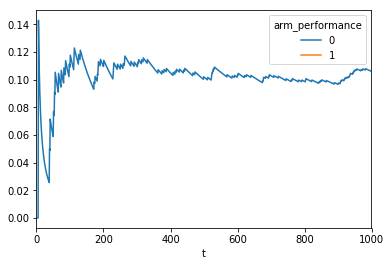

In [223]:
compare_arms_in_simulation(sim_df).plot.line()

Note that the average performance of the first arm converges to the parameter $p$ of the corresponding Bernoulli distribution.

### Fixed Exploration + Greedy



A fixed action policy is a crapshoot; if you are lucky, you select a good action, but if you are not lucky, then you can be stuck with a bad one. One way to reduce the chance of being stuck with a bad action is to explore for a few rounds before commiting to a fixed action. That is what we will implement below.

Below, we implement the transition function tau inside make_greedy_transition that sample each arm the same number of times, and select the one with the largest accumulated rewards (same as highest average rewards).

In [224]:

def make_greedy_transition(bandit, samples_per_arm, s1=None):
    """Draw a fixed amount of samples per arm then go with the best arm.
    
    The state is a means to
    
    - know when the transition from the exploration phase ends and when the exploitation phase begins.
    - know which arm to pull once the exploration phase ends
    
    So we need to track the accumulated rewards of each arm.
    
    In a nutshell:
    
        cycle the arms until all have been pulled `samples_per_turn` times, updating accumulated rewards for each arm
        play the best arm forever
        
    The initial state is given by s.
    
    Example
    -------
    >>> np.random.seed(10)
    >>> bandit = make_bernoulli_bandit([.3, .8])
    >>> greedy = make_greedy_transition(bandit, samples_per_arm=1)
    >>> s2 = greedy(s=None)
    >>> s2
    {'t': 1,
     'arm_rewards': array([1, 0]),
     'arm_pulls': array([1, 0]),
     'n_exploration_pulls': 2,
     'n_arms': 2,
     'best_arm': None}
    >>> s3 = greedy(s=s2)
    >>> s3
    {'t': 2,
     'arm_rewards': array([1, 1]),
     'arm_pulls': array([1, 1]),
     'n_exploration_pulls': 2,
     'n_arms': 2,
     'best_arm': None}
    >>> s4 = greedy(s=s3)
    >>> s4
    {'t': 3,
     'arm_rewards': array([1, 1]),
     'arm_pulls': array([2, 1]),
     'n_exploration_pulls': 2,
     'n_arms': 2,
     'best_arm': 0}
    """
    n_arms = len(bandit)
    s1 = s1 or {
        't': 0,
        'arm_rewards': np.zeros(n_arms, dtype=np.float),
        'arm_pulls': np.zeros(n_arms, dtype=np.int),
        'n_exploration_pulls': n_arms * samples_per_arm,
        'n_arms': n_arms,
        'best_arm': None
    }
        
    def tau(s=None):
        s = deepcopy(s) or deepcopy(s1)
        if s['t'] < s['n_exploration_pulls']:
            arm_id = s['t'] % s['n_arms']  # cycle through the arms in order
        else:
            if s['t'] == s['n_exploration_pulls']:
                s['best_arm'] = np.argmax(s['arm_rewards'])  # find the best arm
            arm_id = s['best_arm']  # play the best arm forever
        # draw the reward and update the state
        arm = bandit[arm_id]
        reward = arm()
        s['arm_pulls'][arm_id] += 1
        s['arm_rewards'][arm_id] += reward
        s['t'] += 1
        return s
    
    return tau


You can now execute the cell below to simulate multiple runs of a greedy algorithm. Notice the best arm wins most of the time, but not always.

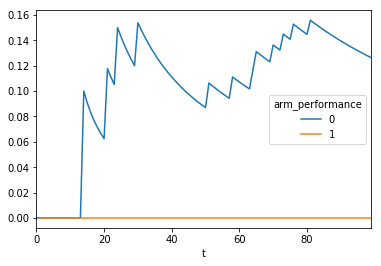

In [225]:
n_periods=100

bernoulli_bandit1 = make_bernoulli_bandit([.1, .2])
greedy = make_greedy_transition(bernoulli_bandit1, samples_per_arm=5)
sim_df = simulate_bandit(greedy, n_periods=n_periods)
compare_arms_in_simulation(sim_df).plot.line();

### Implementing an $\varepsilon$-Greedy Algorithm


The problem with the greedy algorithm is that it cannot recover from a mistake; if it picks a bad arm at the end of the exploration phase, then we are stuck with that forever.

A more robust way to proceed would be to always keep exploring a bit. A simple way to do that is as follows:

- Explore for a fixed number of rounds
- For every period thereafter:
    - with probability (1-epsilon), choose the arm with the best average performance so far
    - with probability epsilon, pick an arm at random

Average performance of an arm here is just the current accumulated rewards from that arm divided by the number of pulls of that arm.

In the code cell below, we implement the pseudo-code above in the pi function inside make_epsilon_greedy_transition.

In [226]:
def make_epsilon_greedy_transition(bandit, samples_per_arm, eps, s1=None):
    """Implement the epsilon-greedy bandit algorithm"""
    n_arms = len(bandit)
    s1 = s1 or {
        't': 0,
        'arm_rewards': np.zeros(n_arms, dtype=np.int),
        'arm_pulls': np.zeros(n_arms, dtype=np.int),
        'n_exploration_pulls': n_arms * samples_per_arm,
        'n_arms': n_arms,
        'eps': eps
    }
        
    def pi(s=None):
        s = deepcopy(s) or deepcopy(s1)
        if s['t'] < s['n_exploration_pulls']:
            arm_id = s['t'] % s['n_arms']  # cycle through the arms in order
        else:
            if np.random.random() < s['eps']:
                arm_id = np.random.randint(s['n_arms'])
            else:
                arm_id = np.argmax(s['arm_rewards'] / s['arm_pulls'])  # find the best arm
        # draw the reward and update the state
        arm = bandit[arm_id]
        reward = arm()
        s['arm_pulls'][arm_id] += 1
        s['arm_rewards'][arm_id] += reward
        s['t'] += 1
        return s
    
    return pi

Execute the cell below multiple times to get the accumulated rewards of different arms under this policy.

Notice that with `n_periods = 100` you often times end up with a bad arm, but with `n_periods = 1000`, that is virtually impossible.

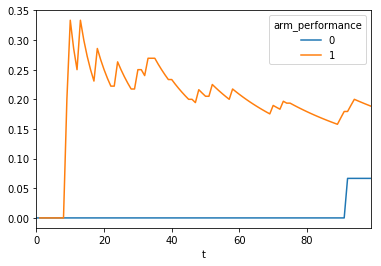

In [227]:
n_periods = 100

bernoulli_bandit1 = make_bernoulli_bandit([.1, .2])
epsgreedy = make_epsilon_greedy_transition(bernoulli_bandit1, samples_per_arm=5, eps=.2)
sim_df = simulate_bandit(epsgreedy, n_periods)
compare_arms_in_simulation(sim_df).plot.line();

### Implementing an Upper Confidence Bound Bandit Algorithm


The $\varepsilon$-greedy policy emphasizes the importance of continue to explore even after you think you have found a good or optimal solution.

But we can do better than that. In the $\varepsilon$-greedy policy when deciding to "explore" – that is, to learn more about the reward probabilities – we do not take into account how many times we have pulled any given arm, which is the main statistic to determine _how_ uncertain we are about the probability of reward from a given arm.

Intuitively, it makes sense to be more certain about the reward probability of an arm that we pulled more times vs. an arm that we pulled fewer times. So, all else equal:

- We should pull arms that have been pulled less often to increase our knowledge of the reward probabilities (exploration)
- We should pull arms that have a higher reward probability to reap rewards of the knowledge we have (exploitation)

One principled way to do that is to use a family of algorithms known as _Upper Confindence Bound_ (UCB) algorithms. The UCB1 algorithm uses Hoeffding's Inequality to provide guaranteed probability bounds on the error of the estimated rewards. The algorithm works as follows:

- Start by pulling each arm exactly once at $t=1$.
- Let $N_{t}(a)$ be the number of times arm $a$ was pulled by period $t$ and $Q_{t}(a)$ be the average reward of arm $a$ at period $t$.
- At every period $t > 1$, pull the arm that maximizes the expression

$$Q_{t}(a) + \sqrt{\frac{2 \ln(t)}{N_{t}(a)}}$$

This policy captures the notion of "optimism under uncertainty".

It's not hard to see that, because $Q_{t}(a)$ is bounded, every arm will be pulled an infinite number of times, if we keep playing indefinitely.


Below, we implement UCB1 in the pi function inside make_ucb1_transition.

In [228]:
def make_ucb1_transition(bandit, s1=None):
    """Implement the UCB1 bandit algorithm
    """
    n_arms = len(bandit)
    s1 = s1 or {
        't': 0,
        'arm_rewards': np.zeros(n_arms, dtype=np.float),
        'arm_pulls': np.zeros(n_arms, dtype=np.int),
        'n_arms': n_arms,
    }
        
    def pi(s=None):
        s = deepcopy(s) or deepcopy(s1)
        if s['t'] < s['n_arms']:
            arm_id = s['t'] % s['n_arms']  # cycle through the arms in order
        else:
            avg_rewards = s['arm_rewards'] / s['arm_pulls']
            uncertainty_term = np.sqrt(2 * np.log(1+s['t']) / s['arm_pulls'])
            arm_id = np.argmax(avg_rewards + uncertainty_term)
        # draw the reward and update the state
        arm = bandit[arm_id]
        reward = arm()
        s['arm_pulls'][arm_id] += 1
        s['arm_rewards'][arm_id] += reward
        s['t'] += 1
        return s
    
    return pi

Execute the cell below multiple times to get the accumulated rewards of different arms under this policy.

Notice again that with `n_periods = 100` you sometimes end up with a bad arm, but with `n_periods = 1000`, that is virtually impossible. You should be able to notice that UCB1 selects the "bad arm" as the best less often than the epsilon-greedy policy just by eye.

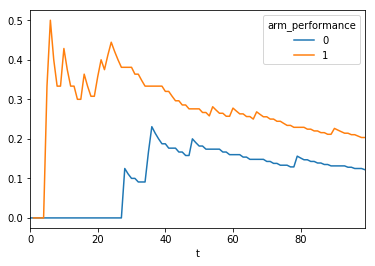

In [229]:
n_periods = 100

bernoulli_bandit1 = make_bernoulli_bandit([.1, .2])
ucb1 = make_ucb1_transition(bernoulli_bandit1)
sim_df = simulate_bandit(ucb1, n_periods)
compare_arms_in_simulation(sim_df).plot.line();

### Beyond Binary Rewards

[Back to top](#Index:) 
<a id='q10'></a>


### Question 10:

*10 points* 

So far we've had binary rewards, leading us to model our bandits as lists of Bernoulli random variables.

We will now show that modeling bandits as lists of random variables was a convenient choice. We will switch from Bernoulli rewards to beta rewards with parameters $a$ and $b$ and verify we are still able to use all our transition, simulation, and plotting functions.

It is desirable to write our functions/classes in a way that makes their reuse possible in a wide variety of situations. That happens when the components of our codebase (functions, data structures, etc.) are _loosely coupled_. For example, the simulation code doesn't need to know details of which policy is being used; it just needs to know how to ask a given transition function for the next state. Crucially, some state variables have to exist (like `arm_pulls`, and `arm_rewards`) across all policies/transitions for that work. Again, carefully modeling state is important for both mathematical and software engineering reasons! 

Below, implement the `make_beta_bandit` function according to the paragraph above. You may want to read the implementation of `make_bernoulli_bandit` earlier on. Note that `scipy.stats.bernoulli` took a single parameter `p`, and `scipy.stats.beta` takes two parameters `a` and `b` from the underlying gamma distribution.

In [230]:
### GRADED

###YOUR SOLUTION HERE

beta = sp.stats.beta  # use this in make_beta_bandit!

def make_beta_bandit(a, b):
    """Make a bandit with beta rewards with params alpha, beta given by arrays a, b.
    
    Parameters
    ----------
    
    a: array with the "alpha" parameters of the distributions of each arm.
    
    b: array with the "alpha" parameters of the distributions of each arm. Same size as `a`
    """
    arms = [beta(a = alpha, b = betta).rvs for alpha, betta in zip(a,b)]
    
    return arms
###
### YOUR CODE HERE
###


In [231]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You can now, for example, simulate what UCB1 would do for a beta bandit with 3 arms.

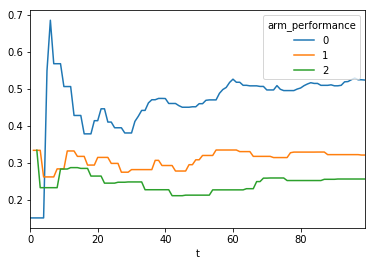

In [232]:
n_periods = 100

beta_bandit = make_beta_bandit([1, 2, 3], [1, 4, 9])
ucb1 = make_ucb1_transition(beta_bandit)
sim_df = simulate_bandit(ucb1, n_periods)
compare_arms_in_simulation(sim_df).plot.line();